In [3]:
import os
cwd = os.getcwd()
print(cwd)
os.chdir("..")
cwd = os.getcwd()
print(cwd)
assert cwd.endswith("src")

C:\Users\feder\Documents\GitHub\relgan\src\jupyter_tests
C:\Users\feder\Documents\GitHub\relgan\src


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from path_resolution import resources_path
from os.path import join
import pandas as pd
from scipy.interpolate import make_interp_spline, BSpline

In [39]:
csv_dir = "KL_divergence_COCO"
csv_path = resources_path(join("tensorboard_graphs", csv_dir))
files = os.listdir(csv_path)

In [40]:
def get_smoothed_line(x, y):
    xnew = np.linspace(x.min(),x.max(),10) #300 represents number of points to make between T.min and T.max

    spl = make_interp_spline(x, y, k=3) #BSpline object
    power_smooth = spl(xnew)
    return xnew, power_smooth

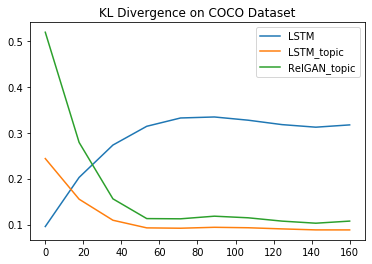

In [42]:
legends = []
for file in files:
    df = pd.read_csv(join(csv_path, file))
    x = df['Step'][:5]
    y = df['Value'][:5]
    legends.append(file.split("-")[1])
    new_x, new_y = get_smoothed_line(x, y)
    plt.plot(new_x, new_y)
plt.legend(legends)
plt.title("KL Divergence on COCO Dataset")
plt.show()